<a href="https://colab.research.google.com/github/Alexxakiode/Introduction-to-Image-Processing-using-Machine-Learning/blob/main/Image_Processing_Cat_or_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat or Dog?

0 is Cat

1 is Dog


In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np

import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import PIL
from PIL import Image

# import tensorflow as tf
# tf.test.gpu_device_name()

from skimage.filters import prewitt_h, prewitt_v, prewitt, sobel_h, sobel_v, sobel
from skimage.feature import hog

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm

from random import randint
from random import seed

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

RANDOM_SEED = 100

In [ ]:
# # unzip file
# import shutil
# shutil.unpack_archive('/content/drive/MyDrive/AppliedAI/Assessment 3/data.zip') #, '/content/drive/MyDrive/AppliedAI/Labs/Lab5_Wk3', 'zip')

In [ ]:
folder = 'C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/data'


##Load image data sets

In [ ]:
# load training data
df_train = pd.read_csv("C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/data/train.csv")

# summarise the details
print(f'Number of entries: {len(df_train)}')
df_train.head()

Number of entries: 10000


,id,label
0,1,cat
1,2,dog
2,3,cat
3,4,cat
4,5,cat


In [ ]:
df_train['label'] = df_train['label'].map({'cat': 0, 'dog' : 1})
df_train.head()

,id,label
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [ ]:
# load testing data
df_test = pd.read_csv("C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/data/test.csv")

# summarise the details
print(f'Number of entries: {len(df_test)}')
df_test.head()

Number of entries: 1000


,id
0,1
1,2
2,3
3,4
4,5


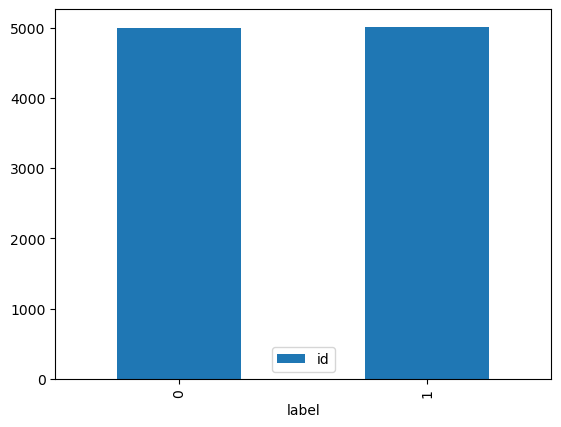

In [ ]:
# Summarise label details in training data
temp_df = df_train.groupby('label').count()

temp_df.plot.bar()
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

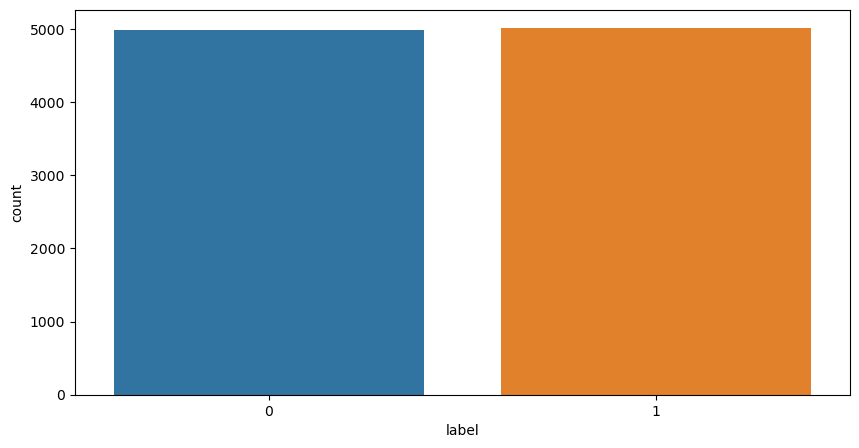

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_train ["label"],  )

In [ ]:
#To view exactly the amount of dogs and that of cat in the dataset
df_train.sum()

id       50005000
label        5011
dtype: int64

In [ ]:
df_train.describe()

,id,label
count,10000.00000,10000.000000
mean,5000.50000,0.501100
std,2886.89568,0.500024
min,1.00000,0.000000
25%,2500.75000,0.000000
50%,5000.50000,1.000000
75%,7500.25000,1.000000
max,10000.00000,1.000000


In [ ]:
# ! pip install pillow

In [ ]:
# !pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report ./df_trainEDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



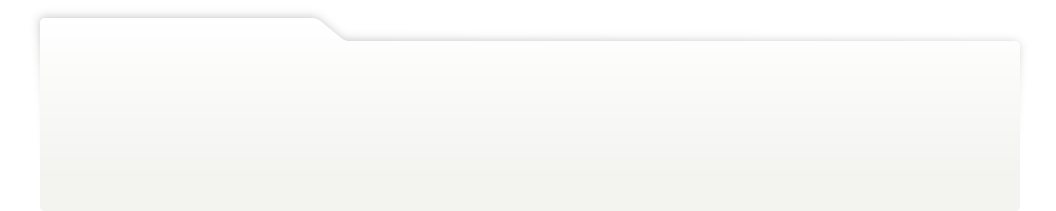
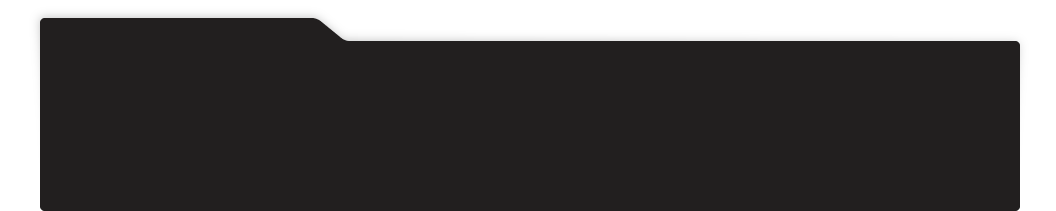
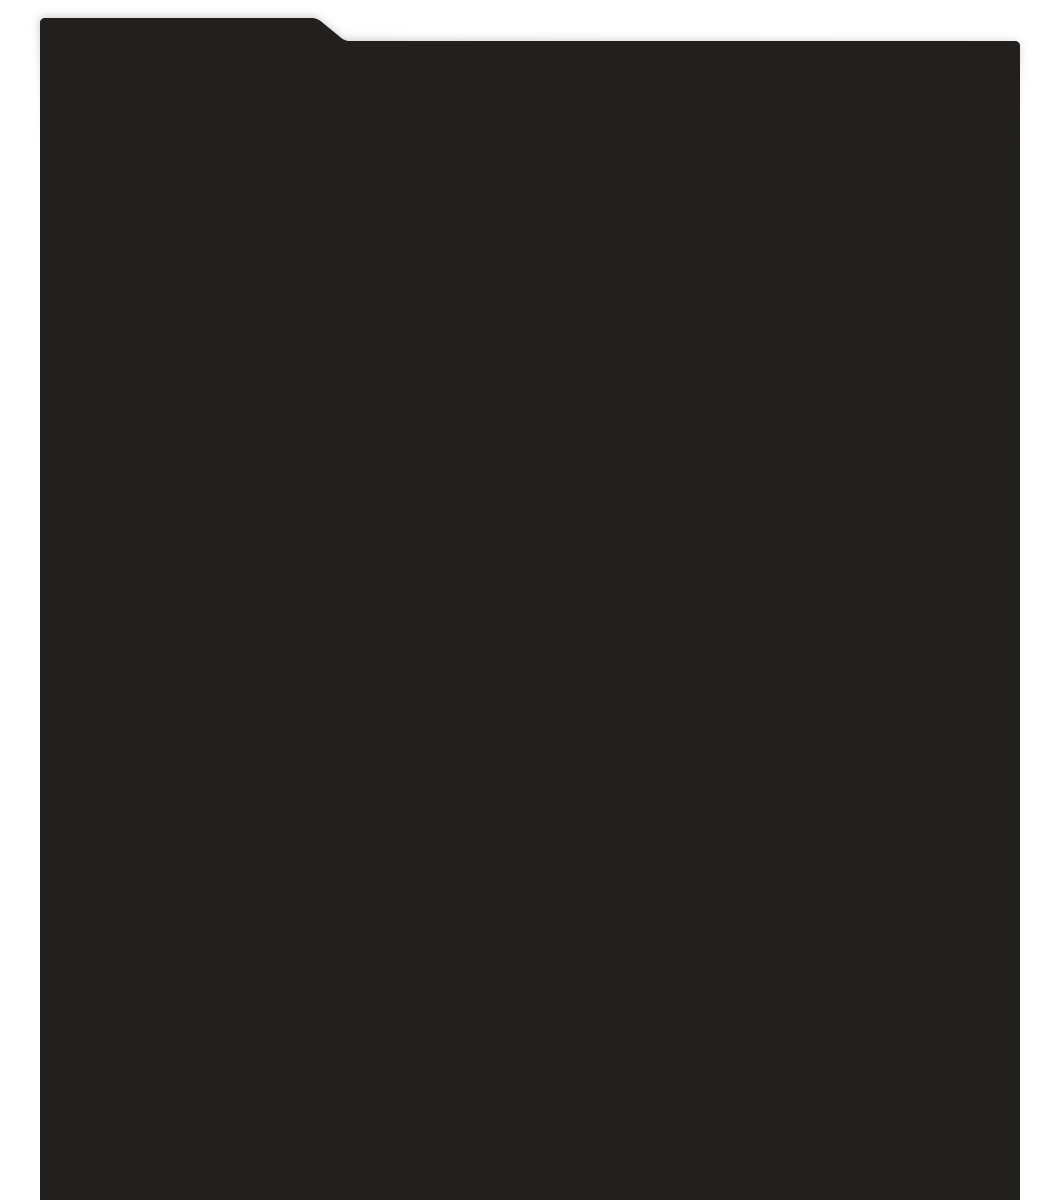
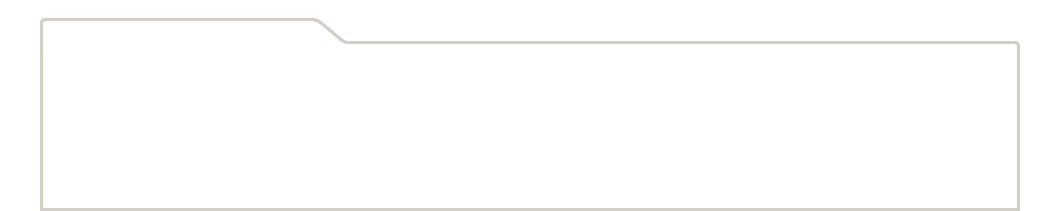
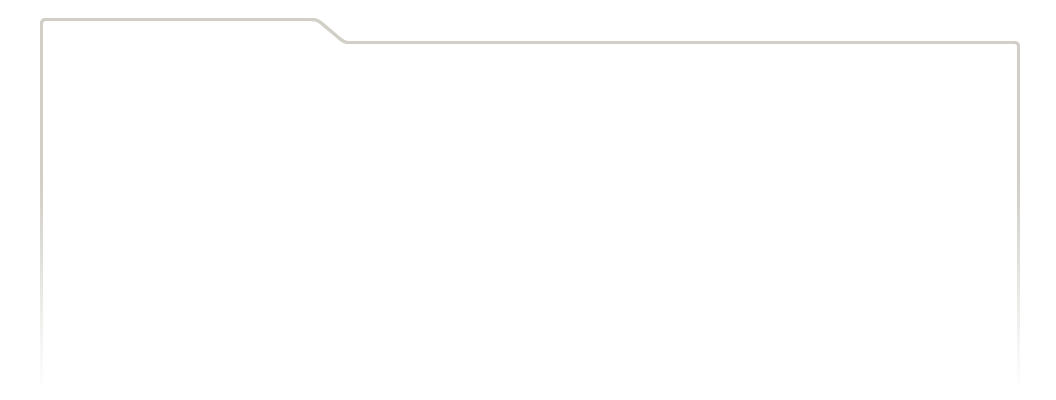
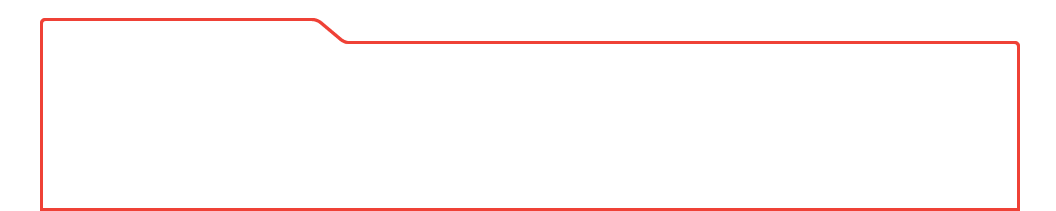
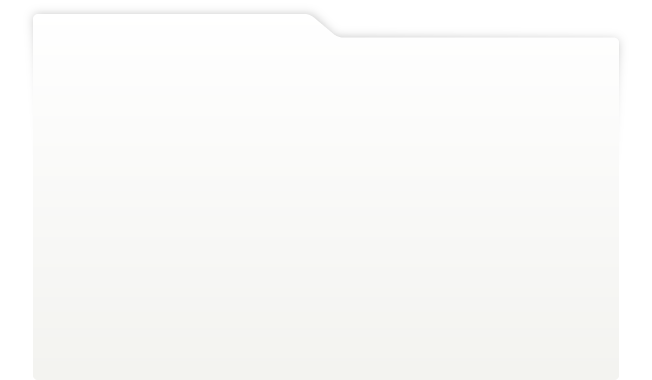
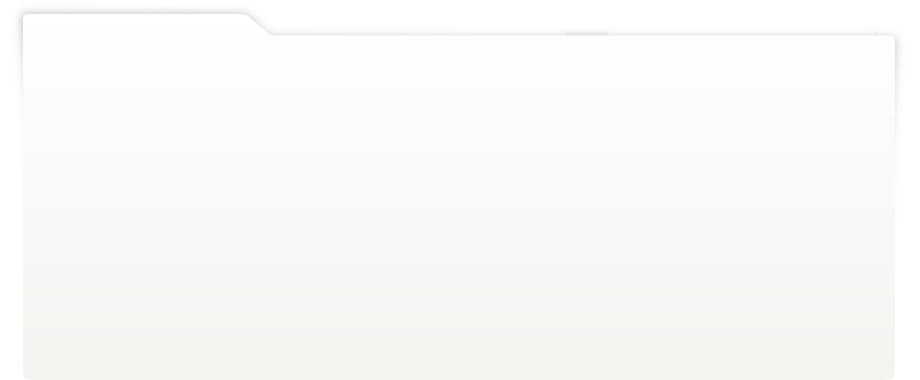
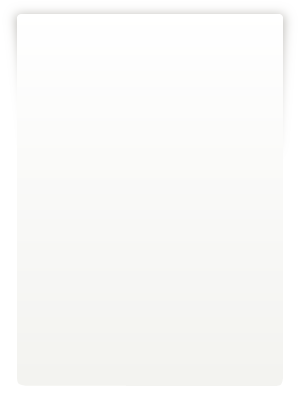
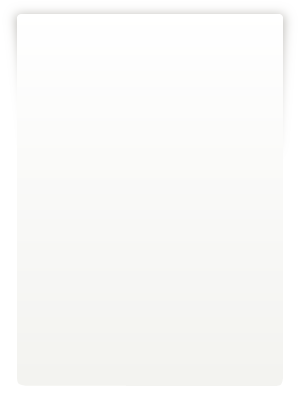
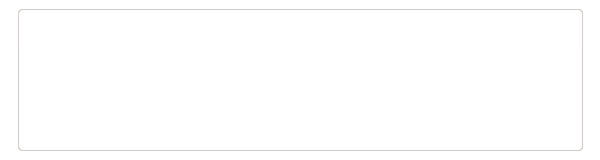
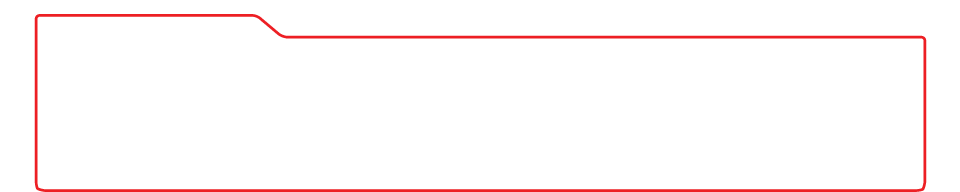
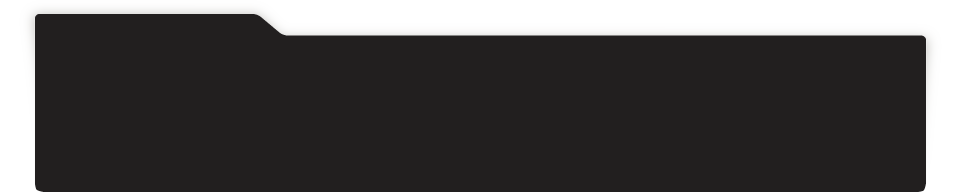
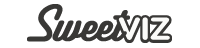
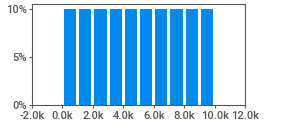
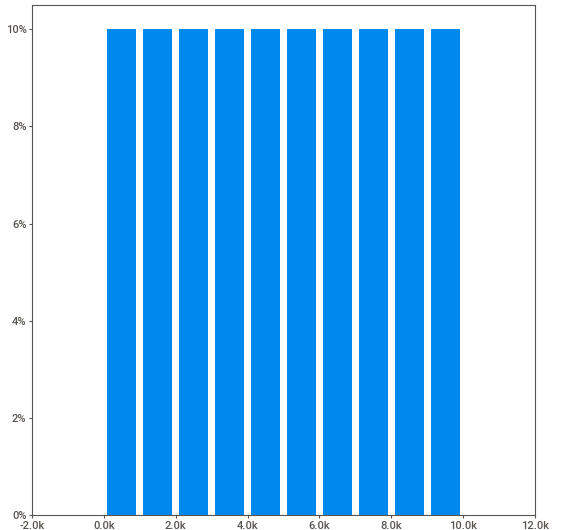
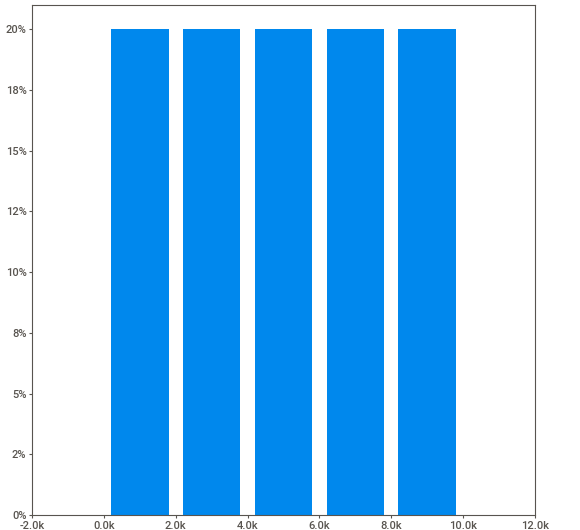
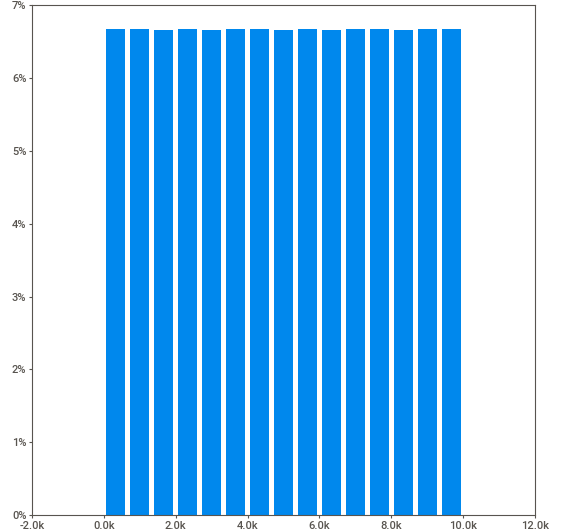
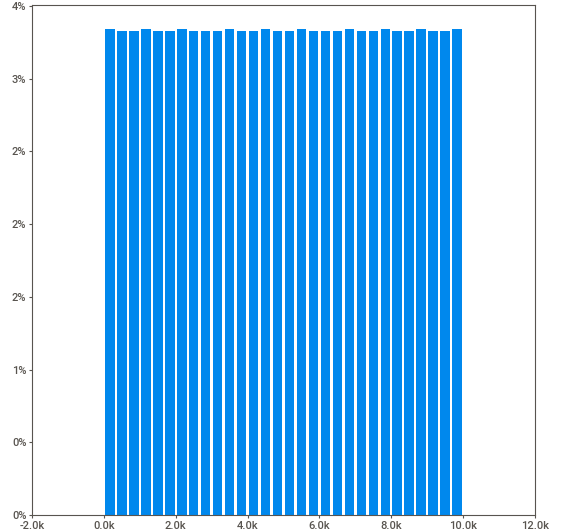
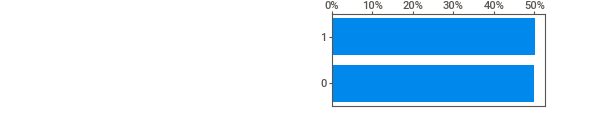
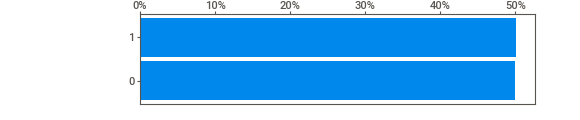
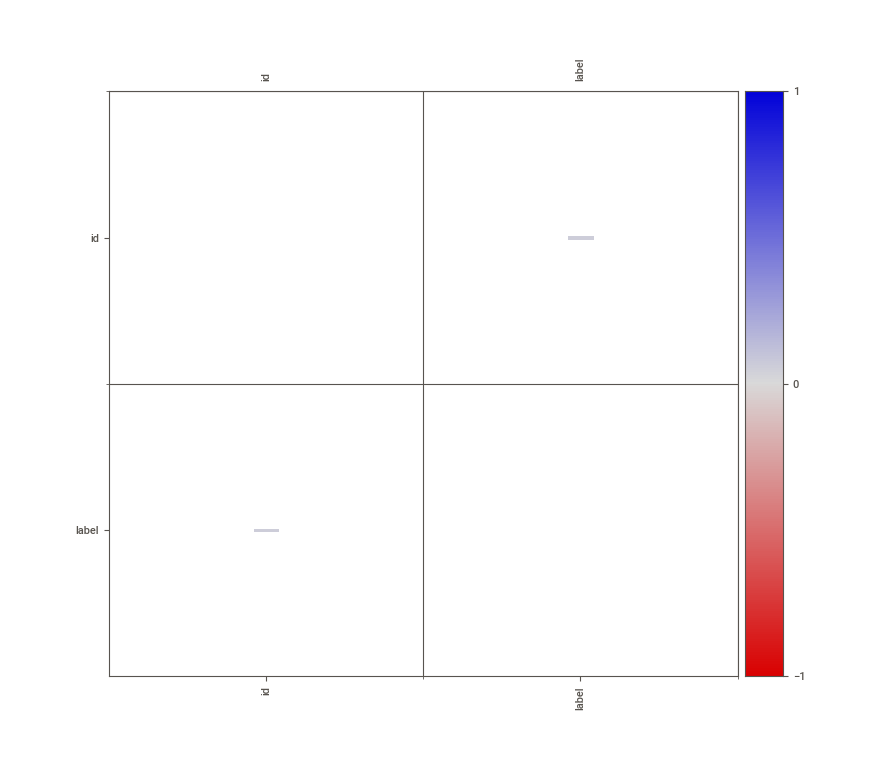
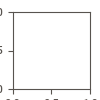

Report './trainEDA' was saved to storage.


In [ ]:
import sweetviz as sv

df_trainEDA = sv.analyze(df_train)
df_trainEDA.show_html("./df_trainEDA.html")
df_trainEDA.show_notebook(None, None, None, 'widescreen', './trainEDA')

##Load images one after the other


In [ ]:
# img1004 = cv2.imread(os.path.join(folder, '/content/drive/MyDrive/AppliedAI/Assessment 3/data/train_images/1004.jpg'))
# plt.xlabel('Intensity')
# plt.ylabel('frequency')
# plt.imshow(img1004)

In [ ]:
# img1004.shape

In [ ]:
# img1 = cv2.imread(os.path.join(folder, '/content/drive/MyDrive/AppliedAI/Assessment 3/data/train_images/1.jpg'))
# plt.xlabel('Intensity')
# plt.ylabel('frequency')
# plt.imshow(img1)

In [ ]:
# img1.shape

In [ ]:
df_trainIMAGES = "C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/data/train_images"

In [ ]:
df_testIMAGES = "C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/data/test_images"

In [ ]:
# from os import listdir
# from os.path import isfile, join

# from PIL import Image

# size_images = []
# for dirpath, _, filenames in os.walk(df_trainIMAGES):
#     for path_image in filenames:
#       image = os.path.abspath(os.path.join(dirpath, path_image))
#       with Image.open(image) as img:
#         width, height = img.size
#         size_images.append(
#                 {
#                     'image': path_image,
#                     'width': width,
#                     'height': height
#                 }
#             )
#     pd.DataFrame(size_images)
# print(size_images)


In [ ]:
# train_group = df_trainIMAGES(by=["id"],ascending=True)

# train_group.plot.bar()
# plt.show()

## We will write a function to help us load the images

In [ ]:
# method to load images
# parameters
# ids - list of image ids
# folder_path - path to image folder
# dim - dimensions to resize images
def load_images(ids, folder_path, dim):
  images = []
  for id in ids:
    image_path = os.path.join(folder_path, "{}.jpg".format(id))
    img = cv2.imread(image_path)

    # Resize if necessary
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images

In [ ]:
base_dim = (300, 300)

# load train images
train_images = load_images (df_train['id'], df_trainIMAGES, base_dim)
print(f'Number of training images loaded: {len(train_images)}')

# load test images
test_images = load_images(df_test['id'], df_testIMAGES, base_dim)
print(f'Number of testing images loaded: {len(test_images)}')

Number of training images loaded: 10000
Number of testing images loaded: 1000


##HOG description for the dataset

In [ ]:
# # Check image size
# print(f'height, width, channels: {img.shape}')

# # Resize image if necessary
# img_resized = cv2.resize(img, (100, 100), interpolation=cv2.INTER_CUBIC)
# print(f'height, width, channels: {img_resized.shape}')
# plt.imshow(img_resized)

# # Get HOG features
# fd, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(4, 4), 
#                     cells_per_block=(2, 2), visualize=True, multichannel=True)
# print(f'length of feature vector: {len(fd)}')
# plt.imshow(hog_image)


In [ ]:

# #Writing the resized images unto folder
# cv2.imwrite("C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/data/resized_train_images", train_images)

# cv2.imwrite("C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/data/resized_test_images", test_images)

## Feature extraction and model generation

In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['0', '1']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=[0, 1])
  return accuracy, confusion_matrix

### RANDOM FOREST

In [ ]:
# method to train and predict using SVM classifier
# def get_svm_predictions(X_train, X_val, y_train, y_val):
    
#   # build model
#     clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
#     clf.fit(X_train, y_train) 
#     return clf

# method to train and predict using RandomForest classifier
from sklearn.ensemble import RandomForestClassifier

#build model
def random_forest_model(X_train, X_val, y_train, y_val):
  rf = RandomForestClassifier(random_state=RANDOM_SEED)
  rf.fit(X_train, y_train)
  return rf


#### M1

- Preprocessing - gray scaling<br>
- Features - image vectorization<br>
- Dim reduction - 
- Algorithm - RF <br>

In [ ]:
# method to get image features
def get_features_m1(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # vectorise/ feature extraction
    features = img_grayscaled.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

Train and validate model

In [ ]:
# feature extraction
features_train = get_features_m1(train_images)
print(features_train.shape)

NameError: name 'get_features_m1' is not defined

In [ ]:
# Principal component extraction
pca = PCA(n_components=2000)
pca.fit(features_train)
features_train_updated = pca.transform(features_train)
print(features_train_updated.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train and validation
m1 = random_forest_model(X_train, X_val, y_train, y_val)

(10000, 2000)


In [ ]:
y_val

8018    0
9225    1
3854    0
2029    1
3539    1
       ..
4208    1
5335    1
2554    0
13      1
4468    1
Name: label, Length: 3000, dtype: int64

Accuracy: 0.6053333333333333


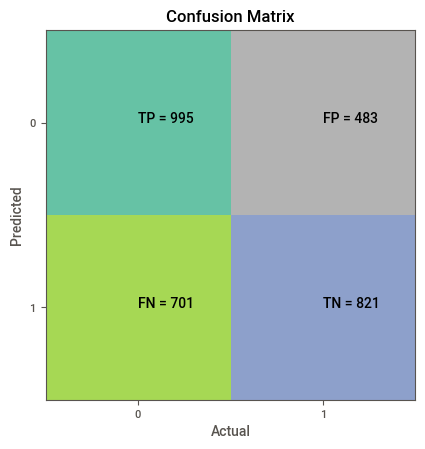

In [ ]:
# make predictions on validation data
y_pred = m1.predict(X_val)

# evaluate model
accuracy,confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


Make predictions on test images

In [ ]:
# feature extraction - test data
features_test = get_features_m1(test_images)
print(features_test.shape)

# get model predictions
predictions = m1.predict(features_test)
print(predictions)

(1000, 90000)
[0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 

#### M2

- Preprocessing - gray scaling, smoothing <br>
- Features - image vector<br>
- Algorithm - RF <br>

To smooth images, we learned 2 commonly used techniques: box filtering and Gaussian filtering. Among them Gaussian filtering is used with this example.

Let's pick a random sample from images to see how smoothing affects them and to get an idea on suitable parameter settings. 

Note - This part is optional for the main flow. 

Image Id: 2386
Image Id: 7528
Image Id: 7453
Image Id: 2863
Image Id: 6439


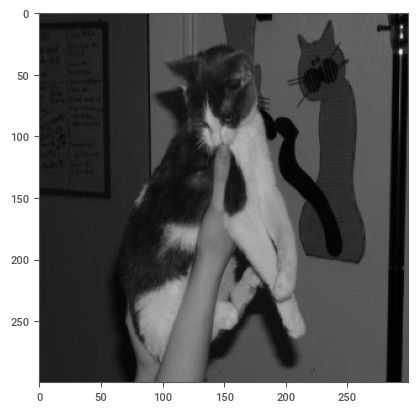

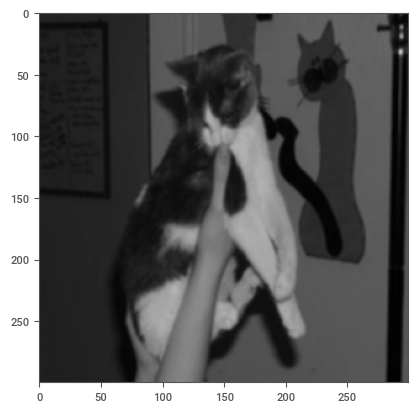

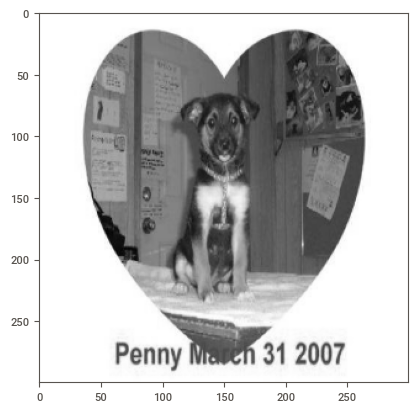

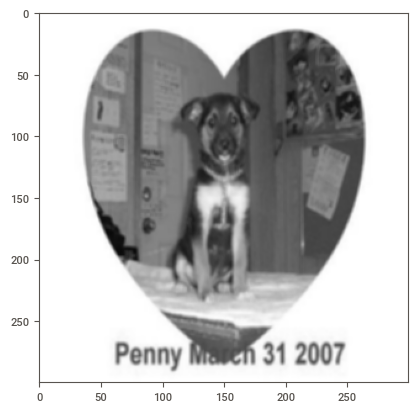

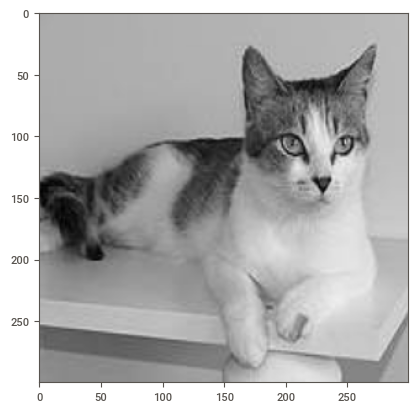

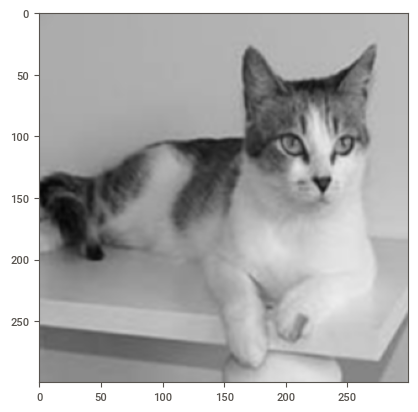

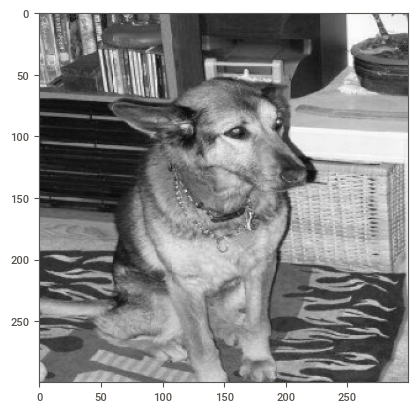

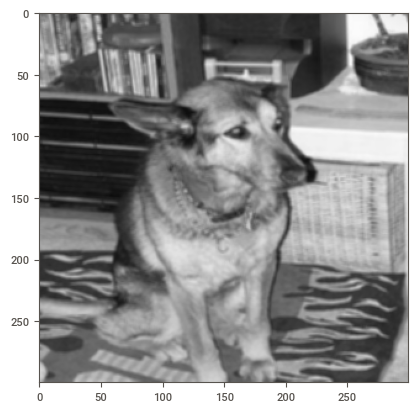

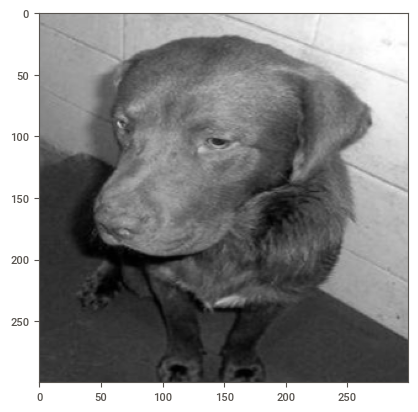

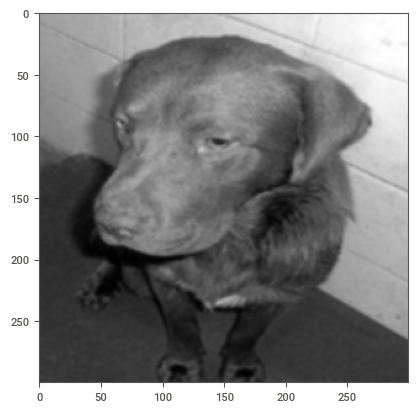

In [ ]:
from random import randint
from random import seed

seed(RANDOM_SEED)
sample_images = []

# pick random sample of images
for i in range(5):
  value = randint(0, len(train_images)-1)
  print(f'Image Id: {value}')
  sample_images.append(train_images[value])

# apply preprocessing and show output images
for img in sample_images:
  img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB))
  plt.show()

  img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)
  plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
  plt.show()
  

In [ ]:
# method to get image features
def get_features_m2(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)

    # vectorise/ feature extraction
    features = img_blurred.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

Train and validate model

In [ ]:
# feature extraction
features_train = get_features_m2(train_images)
print(features_train.shape)

# Principal component extraction
pca = PCA(n_components=2000)
pca.fit(features_train)
features_train_updated = pca.transform(features_train)
print(features_train_updated.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train and validation
m2 = random_forest_model(X_train, X_val, y_train, y_val)

(10000, 90000)
(10000, 2000)


Accuracy: 0.622


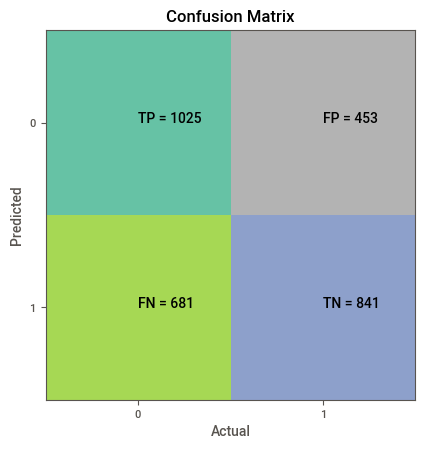

In [ ]:
# make predictions on validation data
y_pred = m2.predict(X_val)

# evaluate model
accuracy,confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

Make predictions on test images

In [ ]:
# feature extraction - test data
features_test = get_features_m2(test_images)
print(features_test.shape)

# get model predictions
predictions = m2.predict(features_test)

print(predictions)

(1000, 90000)
[1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 

# M25

- Preprocessing - gray scaling, bluring, adaptive threshold, morphology <br>
- Features - edge map to vector + PCA 1000<br>
- Algorithm - RF <br>

In [ ]:
def get_features_m25(images):
    features_list = []
    for img in images:
        # convert image to grayscale
        img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # apply Gaussian blur to reduce noise
        img_blur = cv2.GaussianBlur(img_grayscale, (3, 3), 0)

        # apply adaptive thresholding to enhance contrast
        img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

        # apply morphology operations to remove small objects and fill gaps
        kernel = np.ones((3, 3), np.unit8)
        img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
        img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel)

        # apply Canny edge detection with optimized parameters
        edges_canny = cv2.Canny(img_morph, 50, 150)

        # resize image to 64x64 pixels
        img_resized = cv2.resize(img_grayscale, (64, 64))

        # extract HOG features with optimized parameters
        features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', transform_sqrt=True, feature_vector=True)

        # append features to list
        features_list.append(features)

    # convert features list to numpy array
    features_array = np.array(features_list)

    return features_array


Train and validate model

In [ ]:
# feature extraction
features_train = get_features_m25(train_images)
print(features_train.shape)

# Principal component extraction
pca = PCA(n_components=1000)
pca.fit(features_train)
features_train_updated = pca.transform(features_train)
print(features_train_updated.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train and validation
m25 = random_forest_model(X_train, X_val, y_train, y_val)

(10000, 1764)
(10000, 1000)


Accuracy: 0.7083333333333334


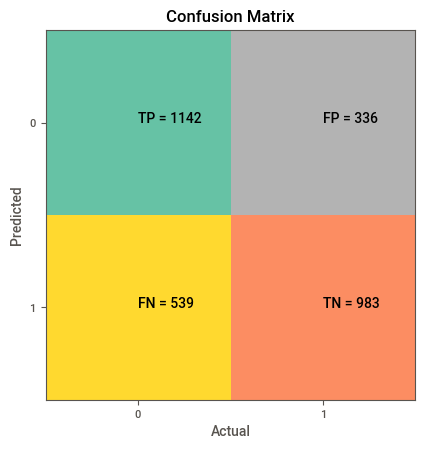

In [ ]:
# make predictions on validation data
y_pred = m25.predict(X_val)

# evaluate model
accuracy,confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

Make predictions on test images

In [ ]:
# feature extraction - test data
features_test = get_features_m25(test_images)
print(features_test.shape)

# get model predictions
prediction1 = m25.predict(features_test)

print(prediction1)

(1000, 1764)
[1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0

# M26



In [ ]:
def get_features_m26(images):
    features_list = []
    for img in images:
        # convert image to grayscale
        img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # apply Gaussian blur to reduce noise
        img_blur = cv2.GaussianBlur(img_grayscale, (3, 3), 0)

        # apply adaptive thresholding to enhance contrast
        img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

        # apply morphology operations to remove small objects and fill gaps
        kernel = np.ones((3, 3), np.uint8)
        img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
        img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel)

        # apply Canny edge detection with optimized parameters
        edges_canny = cv2.Canny(img_morph, 300, 300)

        # resize image to 64x64 pixels
        img_resized = cv2.resize(img_grayscale, (64, 64))

        # extract HOG features with optimized parameters
        features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', transform_sqrt=True, feature_vector=True)

        # append features to list
        features_list.append(features)

    # convert features list to numpy array
    features_array = np.array(features_list)

    return features_array


In [ ]:
# feature extraction
features_train = get_features_m26(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train and validation
m26 = random_forest_model(X_train, X_val, y_train, y_val)

(10000, 1764)


Accuracy: 0.7083333333333334


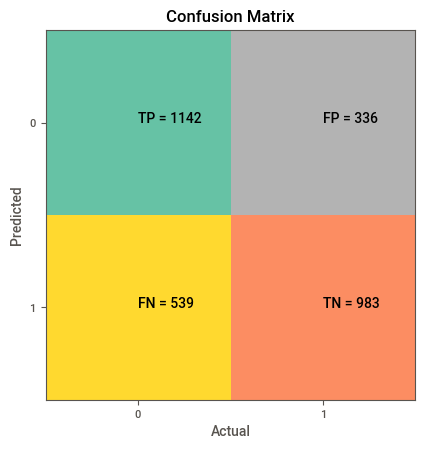

In [ ]:
# make predictions on validation data
y_pred = m26.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

Making predictions on test images

In [ ]:
# feature extraction - test data
features_test = get_features_m26(test_images)
print(features_test.shape)

# get model predictions
predictions_2 = m26.predict(features_test)
print(predictions_2)

(1000, 1764)
[1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0

SVM for M26_1

In [ ]:
def get_features_m26_1(images):
    features_list = []
    for img in images:
        # convert image to grayscale
        img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # apply Gaussian blur to reduce noise
        img_blur = cv2.GaussianBlur(img_grayscale, (3, 3), 0)

        # apply adaptive thresholding to enhance contrast
        img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

        # apply morphology operations to remove small objects and fill gaps
        kernel = np.ones((3, 3), np.uint8)
        img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
        img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel)

        # apply Canny edge detection with optimized parameters
        edges_canny = cv2.Canny(img_morph, 300, 300)

        # resize image to 64x64 pixels
        img_resized = cv2.resize(img_grayscale, (64, 64))

        # extract HOG features with optimized parameters
        features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', transform_sqrt=True, feature_vector=True)

        # append features to list
        features_list.append(features)

    # convert features list to numpy array
    features_array = np.array(features_list)

    return features_array


In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val):
    
  # build model
    clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
    clf.fit(X_train, y_train) 
    return clf

In [ ]:
# feature extraction
features_train = get_features_m26_1(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train and validation
m26_1 = get_svm_predictions(X_train, X_val, y_train, y_val)

(10000, 1764)


Accuracy: 0.707


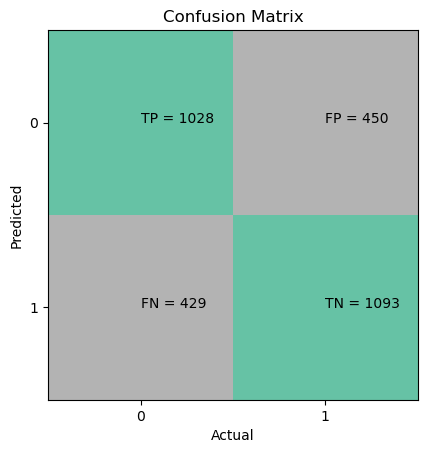

In [ ]:
# make predictions on validation data
y_pred = m26_1.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

In [ ]:
# feature extraction - test data
features_test = get_features_m26_1(test_images)
print(features_test.shape)

# Principal component extraction - test data
features_test_updated2 = pca.transform(features_test)

# get model predictions
predictions2 = m26_1.predict(features_test_updated2)
print(predictions2)

NAIVE BAYES for M26_2

In [ ]:
def get_features_m26_2(images):
    features_list = []
    for img in images:
        # convert image to grayscale
        img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # apply Gaussian blur to reduce noise
        img_blur = cv2.GaussianBlur(img_grayscale, (3, 3), 0)

        # apply adaptive thresholding to enhance contrast
        img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

        # apply morphology operations to remove small objects and fill gaps
        kernel = np.ones((3, 3), np.uint8)
        img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
        img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel)

        # apply Canny edge detection with optimized parameters
        edges_canny = cv2.Canny(img_morph, 300, 300)

        # resize image to 64x64 pixels
        img_resized = cv2.resize(img_grayscale, (64, 64))

        # extract HOG features with optimized parameters
        features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', transform_sqrt=True, feature_vector=True)

        # append features to list
        features_list.append(features)

    # convert features list to numpy array
    features_array = np.array(features_list)

    return features_array


In [ ]:
# method to train and predict using Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

def naive_bayes_model(X_train, X_val, y_train, y_val):
  
  #building the model
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  return gnb

In [ ]:
# method to get image features
def get_features_m26_2(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # vectorise/ feature extraction
    features = img_grayscaled.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
# feature extraction
features_train = get_features_m26_2(train_images)
print(features_train.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train and validation
m26_2 = naive_bayes_model(X_train, X_val, y_train, y_val)

(10000, 90000)


Accuracy: 0.5736666666666667


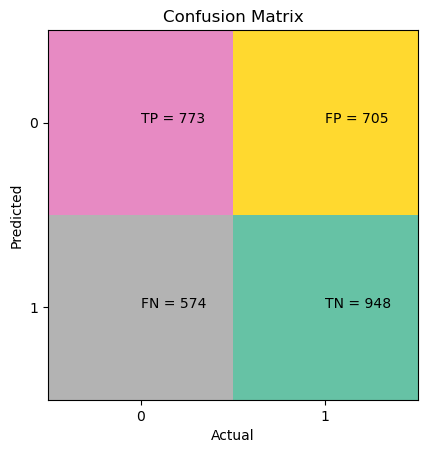

In [ ]:
# make predictions on validation data
y_pred = m26_2.predict(X_val)

# evaluate model
accuracy,confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

In [ ]:
# feature extraction - test data
features_test = get_features_m26_2(test_images)
print(features_test.shape)

# Principal component extraction - test data
features_test_updated3 = pca.transform(features_test)

# get model predictions
predictions3 = m26_2.predict(features_test_updated3)
print(predictions2)

DECISION TREE M26_3

In [ ]:
# method to train and predict using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
# dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
def decision_tree_model(X_train, X_val, y_train, y_val):
  dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
# Fitting the model
  dt.fit(X_train,y_train)
  return dt

In [ ]:
# method to get image features
def get_features_m26_3(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # vectorise/ feature extraction
    features = img_grayscaled.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [ ]:
# feature extraction
features_train = get_features_m26_3(train_images)
print(features_train.shape)

# Principal component extraction
pca = PCA(n_components=2000)
pca.fit(features_train)
features_train_updated = pca.transform(features_train)
print(features_train_updated.shape)

# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train and validation
m26_3 = decision_tree_model(X_train, X_val, y_train, y_val)

(10000, 90000)
(10000, 2000)


Accuracy: 0.5426666666666666


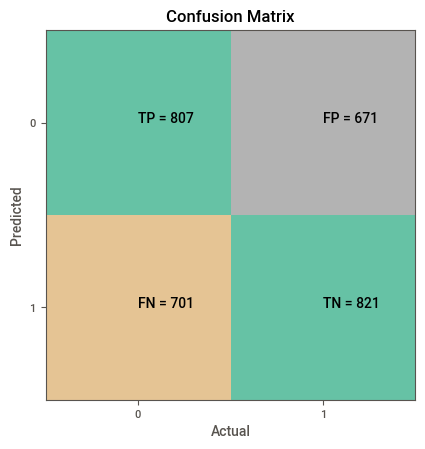

In [ ]:
# make predictions on validation data
y_pred = m26_3.predict(X_val)

# evaluate model
accuracy,confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


In [ ]:
# feature extraction - test data
features_test = get_features_m26_3(test_images)
print(features_test.shape)

# Principal component extraction - test data
features_test_updated4 = pca.transform(features_test)

# get model predictions
predictions4 = m26_3.predict(features_test_updated4)
print(predictions4)

(1000, 90000)


ValueError: X has 2000 features, but DecisionTreeClassifier is expecting 90000 features as input.

### Submission

In [ ]:
#changing the label back to categorical value

negative = "cat"
positive = "dog"

test_pred = [positive if pred == 1 else negative for pred in prediction1]
print(test_pred[:5])

['dog', 'cat', 'cat', 'cat', 'cat']


In [ ]:
#saving the predictions using variable definition
df_test['prediction']= test_pred

In [ ]:
#converting to a csv file for submission
df_test.to_csv('prediction.csv', index = False)

In [ ]:
#saving into a json format

import json

import pandas as pd

test_file_path = "C:/Users/Beth_El 2/Documents/MSc Artificial Intelligence/CMP7229 Applied AI/Week 3/Assignment3/prediction.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "prediction"]]
data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 'dog'}, {'id': 2, 'prediction': 'cat'}, {'id': 3, 'prediction': 'cat'}, {'id': 4, 'prediction': 'cat'}, {'id': 5, 'prediction': 'cat'}]
